## Vor- und Nachname: Wasilios Goutas

# Aufgabe 2: Praxis 

Die Teile 1 bis 6 betragen insgesamt 70 Punkte.

Die 3 Bonus-Teile in dieser Aufgabe betragen insgesamt 30 Punkte, die zusaetzlich zu deiner Note hinzukommen koennen, als Bonus. Ich empfehle, erst die Hauptteile (1-6) zu behandeln. 

#### Tipp: Benutzen Sie die "Kernel--> Restart & Run All" Funktion von Jypyter vor Ihrer Abgabe, um sicherzustellen dass Ihr Code tatsaechlich funktioniert. Ihr koennen auch waehrend Ihrer Arbeit ab und zu diese Funktion benutzen um alle Variablen aus dem Memory wegzuloeschen und von vorne an wieder ausfuehren. 

#### Achtung: die Codes die Fehler ergeben und nicht durchgesetzt werden, werden nicht von mir debugged. 

## Tipp: Reset Random_Seed immer zu 0 (random_state = 0), damit ich auch die gleichen Leistungswerte erzeugen kann. 

## Beschreibung des Problems

Ein Unternehmen hat eine Umfrage durchgeführt und Informationen über Kunden gesammelt, die ein bestimmtes Produkt gekauft haben, und über Kunden, die es nicht gekauft haben. Das Unternehmen möchte eine ML Modell erstellen, mit dessen Hilfe sie vorhersagen können, welche Kunden das Produkt in Zukunft voraussichtlich kaufen werden. Mit dieser Anwendung können sie beispielsweise ihre Werbestrategie entwerfen und optimieren. 

## Teil 1: Laden und Überprüfen von Datensatz Umfrage.csv (auf dem Laufwerk, unter Projektarbeit)
Laden Sie den Datensatz Umfrage.csv (auf dem Laufwerk, unter Projektarbeit). Ziel ist es, die letzte Spalte (Label) in der CSV-Datei aus den vorherigen Spalten vorherzusagen.

Durchsuchen Sie den Datensatz und printen Sie Informationen (oder schreiben Sie Text), indem Sie die folgenden Fragen beantworten:

- Wie viele Datenpunkte haben wir?
- Wie viele Features haben wir?
- Was sind die Datentypen (Data type) von Features?
- Wie viele Klassen gibt es?
- Was sind die möglichen Feature-Werte (welche Werte kann jedes Feature haben)?

### __load data__

In [1]:
# Platz fuer Ihren Code/Anwroten
import pandas as pd
pd.set_option('mode.use_inf_as_na',  True)
pd.set_option('display.max_columns', None)

data = pd.read_csv('Umfrage.csv')
print('data points: ',   data.shape[0])
print('data features: ', data.shape[1])
print('data types: \n',  data.dtypes)
print('unique list / feature values of attribute "Name": ',    data.Name.unique())
print('unique list / feature values of attribute "Drink": ',   data.Drink.unique())
print('unique list / feature values of attribute "Kaeufer": ', data.Kaeufer.unique())

print('number of classes in label "Kaeufer" :', len(data.Kaeufer.unique()))

for c in data.columns:
    if 1 < len(data[c].unique()):
        print(f'usefull feature is: "{c}"')
    else:
        print(f'not usefull feature is: "{c}"')

data points:  15000
data features:  8
data types: 
 Name         object
Height        int64
Weight        int64
Drink        object
Age           int64
PLZ           int64
Einkommen     int64
Kaeufer      object
dtype: object
unique list / feature values of attribute "Name":  ['Unbekannt']
unique list / feature values of attribute "Drink":  ['Nein' 'Oft' 'Gelegentlich']
unique list / feature values of attribute "Kaeufer":  ['Ja' 'Nein']
number of classes in label "Kaeufer" : 2
not usefull feature is: "Name"
usefull feature is: "Height"
usefull feature is: "Weight"
usefull feature is: "Drink"
usefull feature is: "Age"
usefull feature is: "PLZ"
usefull feature is: "Einkommen"
usefull feature is: "Kaeufer"


### __creating some plots to get a better understanding of the data__


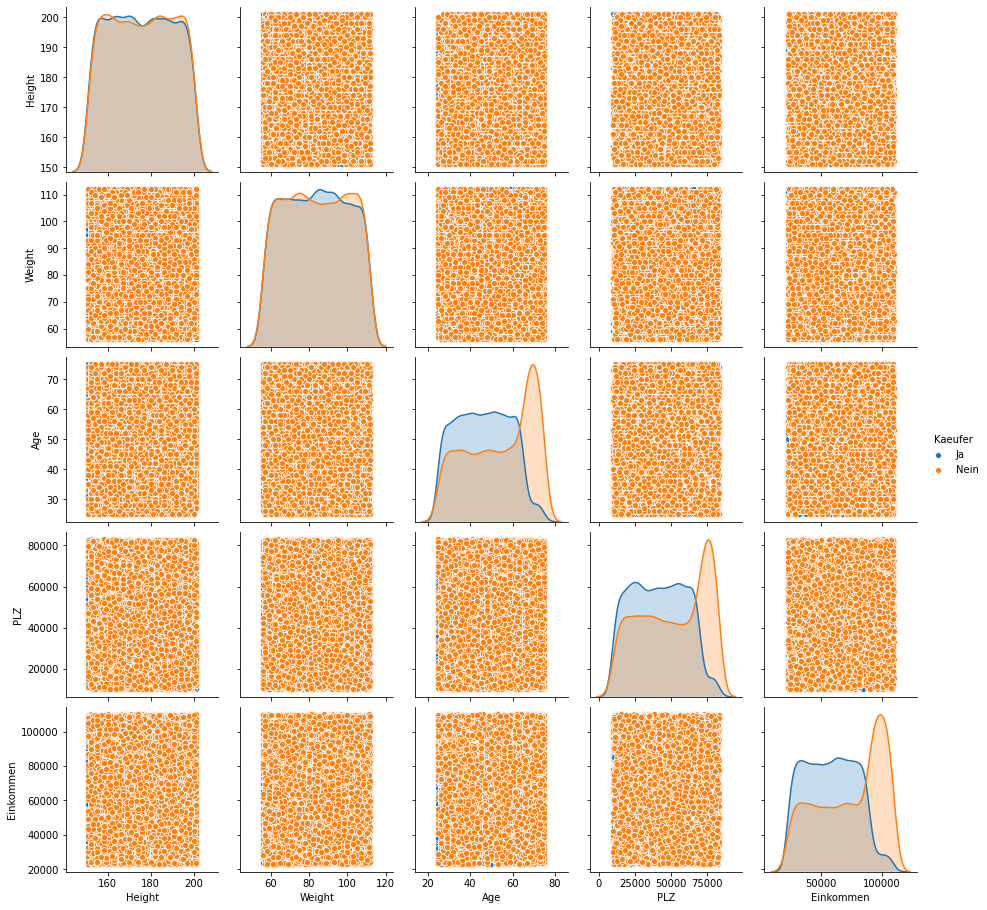

In [2]:
import seaborn as sns

sns.pairplot(data = data, hue='Kaeufer')

In [3]:
import numpy as np
import plotly.express as px
len(np.unique(data.PLZ))
plz_plot_first_2_digits = px.histogram((data.PLZ / 1000).astype(int))
plz_plot_first_2_digits.update_layout( title='histogram of first 2 PLZ digits',
                               xaxis_title='PLZ masked',
                               yaxis_title='count')
plz_plot_first_2_digits.show()

plz_plot_first_digit = px.histogram((data.PLZ / 10000).astype(int))
plz_plot_first_digit.update_layout( title='histogram of first PLZ digit',
                               xaxis_title='PLZ masked',
                               yaxis_title='count')
plz_plot_first_digit.show()


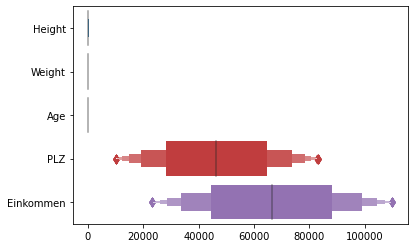

In [4]:
sns.boxenplot(data=data, orient="h")

### __results__
Wie viele Datenpunkte haben wir?
* data points:  15000
 
Wie viele Features haben wir?
* data features:  8
 
Was sind die Datentypen (Data type) von Features?
* data types: 
 Name         object
 Height        int64
 Weight        int64
 Drink        object
 Age           int64
 PLZ           int64
 Einkommen     int64
 Kaeufer      object

Wie viele Klassen gibt es?
* classes 
 unique list / feature values of attribute "Name":  ['Unbekannt']
 unique list / feature values of attribute "Drink":  ['Nein' 'Oft' 'Gelegentlich']
 unique list / feature values of attribute "Kaeufer":  ['Ja' 'Nein']
 number of classes in label "Kaeufer" : 2

Was sind die möglichen Feature-Werte (welche Werte kann jedes Feature haben)?
* possible feature values
 unique list / feature values of attribute "Kaeufer":  ['Ja' 'Nein']
 number of classes in label "Kaeufer" : 2

----
* feature usefull or not
 not usefull feature is: "Name"
 usefull feature is: "Height"
 usefull feature is: "Weight"
 usefull feature is: "Drink"
 usefull feature is: "Age"
 usefull feature is: "PLZ"
 usefull feature is: "Einkommen"
 usefull feature is: "Kaeufer"


## Teil 2: Bereiten Sie die Daten vor

- Entfernen Sie unnötige Features (falls vorhanden)
- Bei allen Datenpunkten sind alle Features vorhanden. Deswegen, brauchen Sie keine Imputation. 
- Codieren Sie kategoriale Features und Labels (Hinweis: Verwenden Sie pd.get_dummies)

### __encode data__

In [5]:
# Platz fuer Ihren Code/Anwroten
from sklearn.preprocessing import MinMaxScaler

data_cleaned = data.drop('Name', axis = 'columns')
print('shape after removing useless feature "Name": ', data_cleaned.shape)

drop_first = False
data_prepared = pd.get_dummies(data_cleaned, sparse = False, drop_first=drop_first)
print(f'shape after one-hot encoding (using pandas.get_dummies(x, drop_first={drop_first})): ', data_prepared.shape)

print('data types of prepared data: ', data_prepared.info())
data_prepared.head()

shape after removing useless feature "Name":  (15000, 7)
shape after one-hot encoding (using pandas.get_dummies(x, drop_first=False)):  (15000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Height              15000 non-null  int64
 1   Weight              15000 non-null  int64
 2   Age                 15000 non-null  int64
 3   PLZ                 15000 non-null  int64
 4   Einkommen           15000 non-null  int64
 5   Drink_Gelegentlich  15000 non-null  uint8
 6   Drink_Nein          15000 non-null  uint8
 7   Drink_Oft           15000 non-null  uint8
 8   Kaeufer_Ja          15000 non-null  uint8
 9   Kaeufer_Nein        15000 non-null  uint8
dtypes: int64(5), uint8(5)
memory usage: 659.3 KB
data types of prepared data:  None


Height  Weight  Age    PLZ  Einkommen  Drink_Gelegentlich  Drink_Nein  \
0     165     102   35  16487      57098                   0           1   
1     198      61   47  45252      77040                   0           0   
2     191      68   73  75815      57805                   0           0   
3     168     100   66  52188      62749                   0           1   
4     188      94   60  80761      55282                   0           1   

   Drink_Oft  Kaeufer_Ja  Kaeufer_Nein  
0          0           1             0  
1          1           1             0  
2          1           1             0  
3          0           0             1  
4          0           0             1

### __select label and features__

In [6]:
import re
labels = [col for col in data_prepared.columns.to_list()
          if re.match(r'Kaeufer', col)]
print('labels after encoding: ', labels)
print('selecting only "Kauefer_Ja" and droping the other')
df_label = pd.DataFrame(data_prepared[labels[0]], index=data_prepared.index,
                        columns=[labels[0]])
df_feature = data_prepared.drop(labels, axis='columns')
print('shape of df_label', df_label.shape)
print('shape of df_feature', df_feature.shape)


labels after encoding:  ['Kaeufer_Ja', 'Kaeufer_Nein']
selecting only "Kauefer_Ja" and droping the other
shape of df_label (15000, 1)
shape of df_feature (15000, 8)


### __features manifold visualization__

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, n_jobs=-1, random_state=0)
tsne_data_encoded = pd.DataFrame(tsne.fit_transform(df_feature))
tsne_data_encoded['Kaeufer_Ja'] = df_label.Kaeufer_Ja
px.scatter_3d(data_frame=tsne_data_encoded, x=0, y=1, z=2, color='Kaeufer_Ja')

### __results__
* data encoded, label and features identified

* labels after encoding:  ['Kaeufer_Ja', 'Kaeufer_Nein']
* selecting only "Kauefer_Ja" and droping the other
* shape of df_label (15000, 1)
* ape of df_feature (15000, 8)

## Teil 3: Wählen Sie ein Modell

Tipp: Beginnen Sie mit train_test_split (random_state = 0) und verwenden Sie dann ein Modell (z. B. k-NN) und spielen Sie manuell mit seinen Hyperparametern. Überprüfen Sie, ob Sie gute Genauigkeitswerte erhalten können. Wenn nicht, verwenden Sie ein anderes Modell und wiederholen Sie den Vorgang, bis Sie glauben, ein gutes Modell zu haben.

Hinweis: Versuchen Sie ein Tree-Modell, wie Random Forrest. Natuerlich koennen Sie auch andere Modelle benutzen. 

### __scale & split data__

In [8]:
# Platz fuer Ihren Code/Anworten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(df_feature, df_label, test_size=0.2,
                                                    shuffle=True, random_state=0)

# scaling
scaler = MinMaxScaler()
scaler.fit(X_train_unscaled)
X_train = pd.DataFrame( scaler.transform(X_train_unscaled), 
                        index=X_train_unscaled.index, columns=X_train_unscaled.columns ) 
                       
X_test = pd.DataFrame( scaler.transform(X_test_unscaled), 
                       index=X_test_unscaled.index, columns=X_test_unscaled.columns )

print('shape of X_train (scaled)', X_train_unscaled.shape)
print('shape of X_test  (scaled)', X_test_unscaled.shape)
print('shape of y_train (scaled)', y_train.shape)
print('shape of y_test  (scaled)', y_test.shape)


shape of X_train (scaled) (12000, 8)
shape of X_test  (scaled) (3000, 8)
shape of y_train (scaled) (12000, 1)
shape of y_test  (scaled) (3000, 1)


### __create some classification models and visualize the confusion matrix__


LogisticRegression


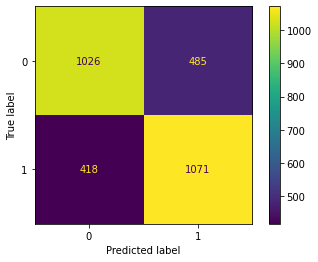

accuracy: 69.90%
f1 score: 70.34%
              precision    recall  f1-score   support

           0       0.71      0.68      0.69      1511
           1       0.69      0.72      0.70      1489

    accuracy                           0.70      3000
   macro avg       0.70      0.70      0.70      3000
weighted avg       0.70      0.70      0.70      3000

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

KNeighborsClassifier


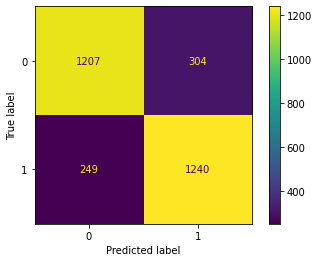

accuracy: 81.57%
f1 score: 81.77%
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1511
           1       0.80      0.83      0.82      1489

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

SVC


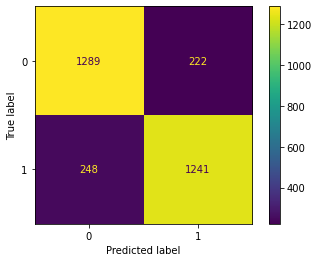

accuracy: 84.33%
f1 score: 84.08%
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1511
           1       0.85      0.83      0.84      1489

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}

RandomForestClassifier


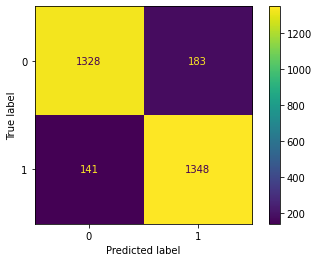

accuracy: 89.20%
f1 score: 89.27%
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1511
           1       0.88      0.91      0.89      1489

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import (auc, roc_curve, roc_auc_score, accuracy_score,
                             mean_absolute_error, mean_squared_error,
                             classification_report, confusion_matrix, plot_confusion_matrix,
                             RocCurveDisplay, f1_score )

models = [ LogisticRegression(random_state=0), KNeighborsClassifier(),
           SVC(random_state=0), RandomForestClassifier(random_state=0) ]

# needed to have a non confusing x-axis label, otherwise the x-axis is 0..15k
y_test_reindexed = y_test
y_test_reindexed.index=range(len(y_test))

for m in models :

    m.fit(X_train, y_train.values.ravel())
    y_pred = m.predict(X_test) 
    #y_pred_proba =  m.predict_proba(X_test)

    model_type = str(type(m).__name__)
    print('\n' + model_type)
    
    Y = y_test_reindexed.join( pd.DataFrame( y_pred, index=y_test_reindexed.index, 
                                             columns=y_test_reindexed.columns ),
                               rsuffix='_predicted')
    
#    scatter_plt = px.scatter(data_frame=Y)
#    scatter_plt.update_layout( title=f'{model_type}',
#                               xaxis_title='',
#                               yaxis_title='Käufe "Ja"')
#    scatter_plt.show()
    plot_confusion_matrix(m, X_test, y_test_reindexed)  
    plt.show()
    print( 'accuracy: %.2f%%' %( 100 * accuracy_score(y_test_reindexed, y_pred)) )
    print( 'f1 score: %.2f%%' %( 100 * f1_score(y_test_reindexed, y_pred, average = 'binary')) )
    print( classification_report(y_test_reindexed, y_pred) )
    print(m.get_params())


### __hyper parameter tuning__

going to fine tune the hyperparameter of the RandomForestClassifier
which already performes quite good with an f1 score of ~89%


RandomForestClassifier with 2 estimators


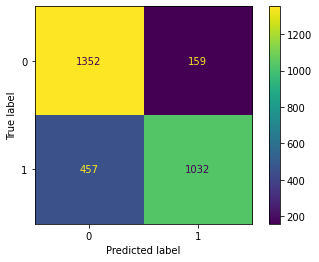

accuracy: 79.47%
f1 score: 77.01%
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1511
           1       0.87      0.69      0.77      1489

    accuracy                           0.79      3000
   macro avg       0.81      0.79      0.79      3000
weighted avg       0.81      0.79      0.79      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 2, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

RandomForestClassifier with 5 estimators


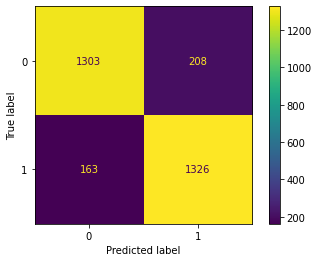

accuracy: 87.63%
f1 score: 87.73%
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1511
           1       0.86      0.89      0.88      1489

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 5, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

RandomForestClassifier with 50 estimators


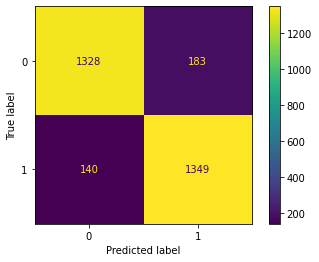

accuracy: 89.23%
f1 score: 89.31%
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1511
           1       0.88      0.91      0.89      1489

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

RandomForestClassifier with 25 estimators


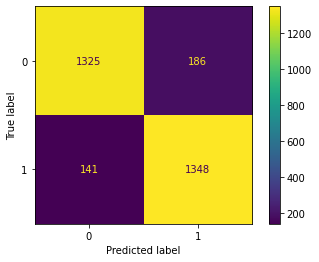

accuracy: 89.10%
f1 score: 89.18%
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1511
           1       0.88      0.91      0.89      1489

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 25, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

RandomForestClassifier with 50 estimators


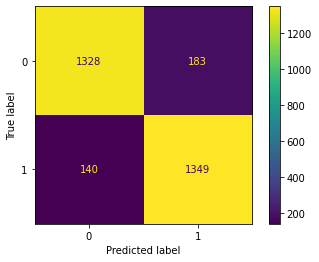

accuracy: 89.23%
f1 score: 89.31%
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1511
           1       0.88      0.91      0.89      1489

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

RandomForestClassifier with 100 estimators


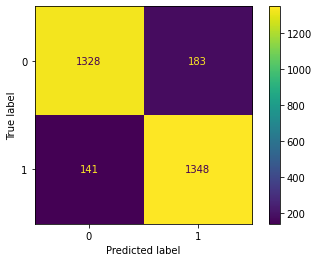

accuracy: 89.20%
f1 score: 89.27%
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1511
           1       0.88      0.91      0.89      1489

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

RandomForestClassifier with 250 estimators


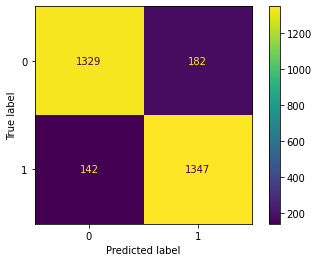

accuracy: 89.20%
f1 score: 89.26%
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1511
           1       0.88      0.90      0.89      1489

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 250, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

RandomForestClassifier with 500 estimators


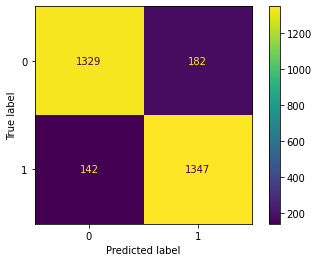

accuracy: 89.20%
f1 score: 89.26%
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1511
           1       0.88      0.90      0.89      1489

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [10]:
for n_estimators in [2, 5, 50, 25, 50, 100, 250, 500] :
    print(f'\nRandomForestClassifier with {n_estimators} estimators')
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=0)    
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    plot_confusion_matrix(model, X_test, y_test_reindexed.values.ravel())  
    plt.show()
    print( 'accuracy: %.2f%%' %( 100 * accuracy_score(y_test_reindexed, y_pred)) )
    print( 'f1 score: %.2f%%' %( 100 * f1_score(y_test_reindexed, y_pred, average = 'binary')) )
    print( classification_report(y_test_reindexed, y_pred) )  
    print( model.get_params() )


### __results__
* scaled and splitted data
* run tests with listz of classifiers (LogisticRegression, KNeighborsClassifier,SVC, RandomForestClassifier)
* selected model type is __RandomForestClasifier__
 accuracy reached ~89% 
* run hyperparameter tuning on RandomForrest 
accuracy is stable with n_estimators >= 50



## Teil 4: Overfitting und underfitting

Experimentieren Sie mit Hyperparametern, um eine Überanpassung (Overfitting) zu zeigen. Beschreiben Sie, was Sie getan und beobachtet haben.

Weiterm, experimentieren Sie mit Hyperparametern, um eine Unteranpassung (Underfitting) zu zeigen. Beschreiben Sie, was Sie getan und beobachtet haben.

### __again confusion matrixes to show over- and underfitting__


RandomForestClassifier with 1 estimators


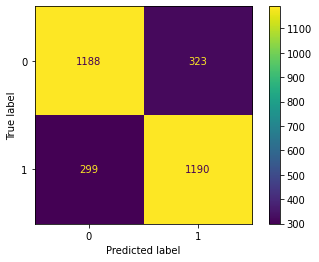

train accuracy: 92.61%
test accuracy: 79.27%
train f1 score: 92.73%
test f1 score: 79.28%
classification report of train results               precision    recall  f1-score   support

           0       0.92      0.93      0.92      5887
           1       0.93      0.93      0.93      6113

    accuracy                           0.93     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.93      0.93      0.93     12000

classification report of test results               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1511
           1       0.79      0.80      0.79      1489

    accuracy                           0.79      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.79      0.79      0.79      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impur

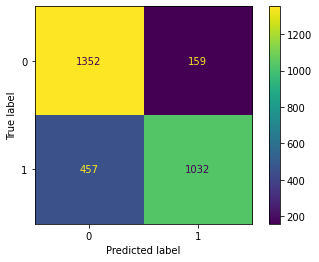

train accuracy: 92.57%
test accuracy: 79.47%
train f1 score: 92.24%
test f1 score: 77.01%
classification report of train results               precision    recall  f1-score   support

           0       0.88      0.99      0.93      5887
           1       0.99      0.87      0.92      6113

    accuracy                           0.93     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.93      0.93      0.93     12000

classification report of test results               precision    recall  f1-score   support

           0       0.75      0.89      0.81      1511
           1       0.87      0.69      0.77      1489

    accuracy                           0.79      3000
   macro avg       0.81      0.79      0.79      3000
weighted avg       0.81      0.79      0.79      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impur

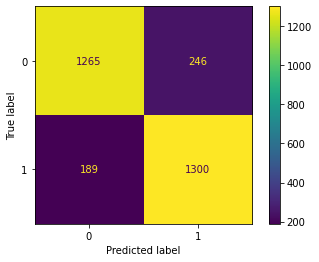

train accuracy: 96.81%
test accuracy: 85.50%
train f1 score: 96.86%
test f1 score: 85.67%
classification report of train results               precision    recall  f1-score   support

           0       0.96      0.97      0.97      5887
           1       0.97      0.97      0.97      6113

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000

classification report of test results               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1511
           1       0.84      0.87      0.86      1489

    accuracy                           0.85      3000
   macro avg       0.86      0.86      0.85      3000
weighted avg       0.86      0.85      0.85      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impur

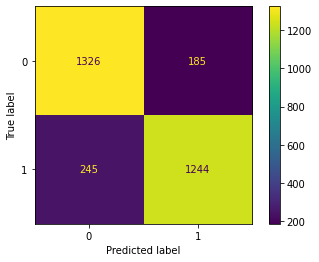

train accuracy: 96.73%
test accuracy: 85.67%
train f1 score: 96.72%
test f1 score: 85.26%
classification report of train results               precision    recall  f1-score   support

           0       0.95      0.99      0.97      5887
           1       0.99      0.95      0.97      6113

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000

classification report of test results               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1511
           1       0.87      0.84      0.85      1489

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impur

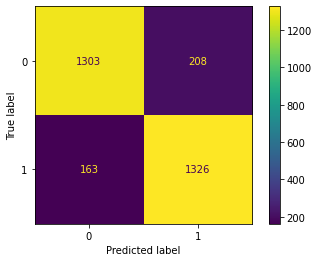

train accuracy: 97.92%
test accuracy: 87.63%
train f1 score: 97.96%
test f1 score: 87.73%
classification report of train results               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5887
           1       0.98      0.98      0.98      6113

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000

classification report of test results               precision    recall  f1-score   support

           0       0.89      0.86      0.88      1511
           1       0.86      0.89      0.88      1489

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impur

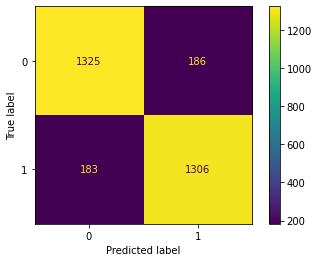

train accuracy: 97.82%
test accuracy: 87.70%
train f1 score: 97.83%
test f1 score: 87.62%
classification report of train results               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5887
           1       0.99      0.97      0.98      6113

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000

classification report of test results               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1511
           1       0.88      0.88      0.88      1489

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impur

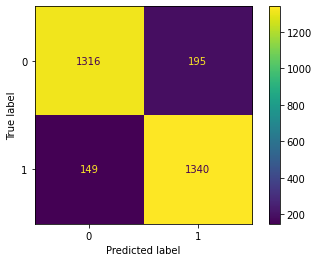

train accuracy: 98.20%
test accuracy: 88.53%
train f1 score: 98.23%
test f1 score: 88.62%
classification report of train results               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5887
           1       0.98      0.98      0.98      6113

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000

classification report of test results               precision    recall  f1-score   support

           0       0.90      0.87      0.88      1511
           1       0.87      0.90      0.89      1489

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impur

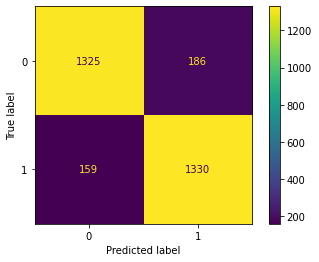

train accuracy: 98.16%
test accuracy: 88.50%
train f1 score: 98.18%
test f1 score: 88.52%
classification report of train results               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5887
           1       0.99      0.97      0.98      6113

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000

classification report of test results               precision    recall  f1-score   support

           0       0.89      0.88      0.88      1511
           1       0.88      0.89      0.89      1489

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.88      3000
weighted avg       0.89      0.89      0.88      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impur

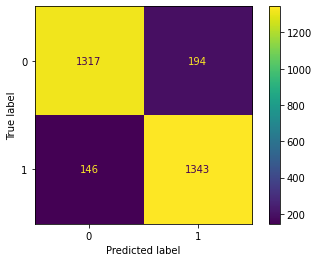

train accuracy: 98.55%
test accuracy: 88.67%
train f1 score: 98.58%
test f1 score: 88.76%
classification report of train results               precision    recall  f1-score   support

           0       0.99      0.98      0.99      5887
           1       0.98      0.99      0.99      6113

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000

classification report of test results               precision    recall  f1-score   support

           0       0.90      0.87      0.89      1511
           1       0.87      0.90      0.89      1489

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impur

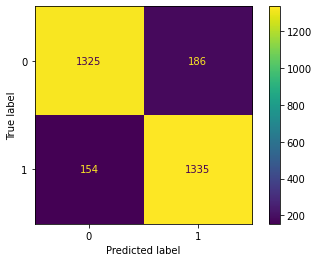

train accuracy: 98.64%
test accuracy: 88.67%
train f1 score: 98.66%
test f1 score: 88.70%
classification report of train results               precision    recall  f1-score   support

           0       0.98      0.99      0.99      5887
           1       0.99      0.98      0.99      6113

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000

classification report of test results               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1511
           1       0.88      0.90      0.89      1489

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impur

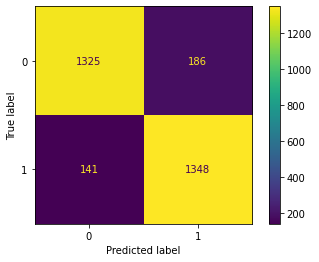

train accuracy: 99.58%
test accuracy: 89.10%
train f1 score: 99.59%
test f1 score: 89.18%
classification report of train results               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5887
           1       1.00      1.00      1.00      6113

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

classification report of test results               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1511
           1       0.88      0.91      0.89      1489

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impur

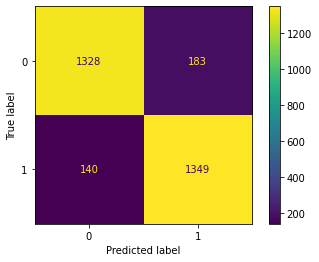

train accuracy: 99.91%
test accuracy: 89.23%
train f1 score: 99.91%
test f1 score: 89.31%
classification report of train results               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5887
           1       1.00      1.00      1.00      6113

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

classification report of test results               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1511
           1       0.88      0.91      0.89      1489

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impur

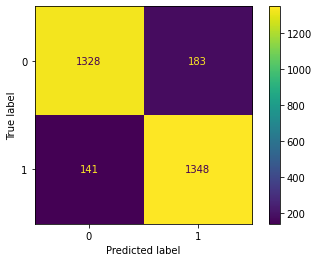

train accuracy: 100.00%
test accuracy: 89.20%
train f1 score: 100.00%
test f1 score: 89.27%
classification report of train results               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5887
           1       1.00      1.00      1.00      6113

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

classification report of test results               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1511
           1       0.88      0.91      0.89      1489

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_imp

In [11]:
# Platz fuer Ihren Code/Anworten
for n_estimators in [1,2,3,4,5,6,7,8,9,10, 25, 50, 100] :
    print(f'\nRandomForestClassifier with {n_estimators} estimators')
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=0)    
    model.fit(X_train, y_train.values.ravel())
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    plot_confusion_matrix(model, X_test, y_test_reindexed.values.ravel())  
    plt.show()
    print( 'train accuracy: %.2f%%' %( 100 * accuracy_score(y_train, y_pred_train)) )
    print( 'test accuracy: %.2f%%' %( 100 * accuracy_score(y_test_reindexed, y_pred_test)) )
    print( 'train f1 score: %.2f%%' %( 100 * f1_score(y_train, y_pred_train, average = 'binary')) )
    print( 'test f1 score: %.2f%%' %( 100 * f1_score(y_test_reindexed, y_pred_test, average = 'binary')) )
    print( 'classification report of train results', classification_report(y_train, y_pred_train) )  
    print( 'classification report of test results', classification_report(y_test_reindexed, y_pred_test) )  
    print( model.get_params() )


### __RandomForestClassifier hyper parameter identification by plotting accuracies and f1 scores__

In [12]:
from sklearn.metrics import accuracy_score, auc, f1_score
acc_train = []
acc_test  = []
f1_train = []
f1_test  = []

for n_estimators in range(1,100):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    model.fit(X_train, y_train.values.ravel())
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    acc_train.append( accuracy_score(y_train, y_pred_train) )
    acc_test.append(  accuracy_score(y_test,  y_pred_test) )
    f1_train.append( f1_score(y_train, y_pred_train) )
    f1_test.append(  f1_score(y_test,  y_pred_test) )

acc = pd.DataFrame()
acc['train accuracy'] = acc_train
acc['test accuray']   = acc_test
acc_plt = px.line(data_frame=acc)
acc_plt.update_layout( title='RandomForestClassifier train vs. test accuracy scores',
                       xaxis_title='n_estimators',
                       yaxis_title='mean squared error')
acc_plt.show()

f1 = pd.DataFrame()
f1['train f1 score'] = f1_train
f1['test f1 score']  = f1_test
f1_plt = px.line(data_frame=f1)
f1_plt.update_layout( title='RandomForestClassifier train vs. test f1-score results',
                               xaxis_title='n_estimators',
                               yaxis_title='f1-score')
f1_plt.show()

### __DesicionTreeClassifier hyper parameter identification by plotting accuracies and f1 scores__

In [13]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
acc_train = []
acc_test  = []
f1_train = []
f1_test  = []

for depth in [10, 100, 1000, 10000]:
    model = DecisionTreeClassifier(random_state=0, max_depth=depth)
    model.fit(X_train, y_train.values.ravel())
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    acc_train.append( accuracy_score(y_train, y_pred_train) )
    acc_test.append(  accuracy_score(y_test,  y_pred_test) )
    f1_train.append( f1_score(y_train, y_pred_train) )
    f1_test.append(  f1_score(y_test,  y_pred_test) )

acc = pd.DataFrame()
acc['train accuracy'] = acc_train
acc['test accuray']   = acc_test
#acc.index = [10, 100, 1000, 10000]
acc_plt = px.line(data_frame=acc)
acc_plt.update_layout( title='DecisionTreeClassifier train vs. test accuracy score results',
                               xaxis_title='max_depth',
                               yaxis_title='accurcy score')
acc_plt.show()

f1 = pd.DataFrame()
f1['train f1 score'] = f1_train
f1['test f1 score']  = f1_test
#f1.index = [10, 100, 1000, 10000]
f1_plt = px.line(data_frame=f1)
f1_plt.update_layout( title='RandomForestClassifier train vs. test f1-score results',
                               xaxis_title='n_estimators',
                               yaxis_title='f1-score')
f1_plt.show()

### __results__
What I did
* I iterated through a list of increasing numbers used as n_estimator hyperparameter in the created RF classifier
* calculated and printed the mean absolut error of training and testing datasets
* printed a classification report
* plotted the confusion matrix of testing results
to get an overview of the models quality with different estimator settings.
I identified that the results stabilized already with estimators < 10

### underfitting
The model is underfitted with estimators 1..4.
As the error graphic shows, the even the training error is quite high in this range.

### overfitting 
The graphics shows, that the model is overfitting as more estimators are been used (error tends to 0, score tends to 100%) 


## Teil 5: Optimieren Sie Hyperparameter mithilfe der Gittersuche (GridSearch)

Hinweis: GridsearchCV benutzen um das beste bzw. die besten Hyperparameter festzustellen. 

### __grid search and cross validation of RandomForestClassifier__

__The crossvalidation is splitting the data into x peases of train / test sets, so it will get the complete dataset instead the already splitted__

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


# Platz fuer Ihren Code/Anworten
RF_base_model = RandomForestClassifier(random_state=0)
# hyper parameter to use in search
h_params = {'n_estimators': [10, 100, 1000],
            #'criterion': ['gini', 'entropy'],
            #'max_features': [None, 'sqrt', 'log2'],
            #'min_samples_split': [2,3,4,5],
            'min_samples_leaf': [0.2, 0.6, 1],
            'max_depth': [5, 50, 100, 1000]}

RF_clf = GridSearchCV(estimator=RF_base_model, param_grid=h_params, cv=5, n_jobs=-1)
RF_clf.fit(X_train, y_train.values.ravel())

RF_cv_scores = cross_val_score( RF_clf, X=df_feature, 
                                y=df_label.values.ravel(), 
                                cv=5, verbose=0 ) 
print('mean RF cv scores', RF_cv_scores.mean())
RF_cv_plt = px.line(data_frame=pd.DataFrame({'RF cv score':RF_cv_scores}))
RF_cv_plt.update_layout( title='Cross Validation RF classifier scores',
                               xaxis_title='k-split',
                               yaxis_title='score')


mean RF cv scores 0.8965333333333334


### __grid search and cross validation of DecissionTreeClassifier__


In [15]:
from sklearn.tree import DecisionTreeClassifier

# Platz fuer Ihren Code/Anworten
DC_base_model = DecisionTreeClassifier(random_state=0)
# hyper parameter to use in search
h_params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000]}

DC_clf = GridSearchCV(estimator=DC_base_model, param_grid=h_params, cv=5, n_jobs=-1)
DC_clf.fit(X_train, y_train.values.ravel())

DC_cv_scores = cross_val_score( DC_clf, X=df_feature, 
                                  y=df_label.values.ravel(), 
                                  cv=5, verbose=0 ) 
print('mean DC cv scores', DC_cv_scores.mean())
RF_cv_plt = px.line(data_frame=pd.DataFrame({'DC cv score':DC_cv_scores}))
RF_cv_plt.update_layout( title='Cross Validation DC classifier scores',
                               xaxis_title='k-split',
                               yaxis_title='score')


mean DC cv scores 0.8966


### __results__
* grid search of RandomForestClassifier
 mean RF cv scores 0.8965333333333334
* grid search of DecissionTreeClassifier
 mean DC cv scores 0.8966
 
Resulting accuracy scores are similar to the once found at the beginning, even tuning hyperparameters 

## Teil 6: Evaluieren Sie das Modell

Erzeugen Sie F1-score, Sensitivity und Specificty Werte fuers atuelle train_test_split und Hyperparameter.  
Mit den optimierten Hyperparametern, evaluarieren Sie das Modell mithifle von cross validation. 

### __cross validation of best model parameter settings__
basically already done in part 5

#### __Random Forest__

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


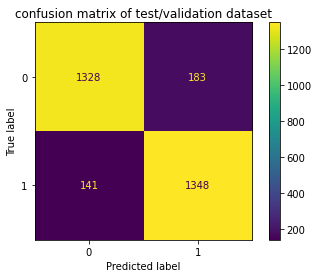

train accuracy: 100.00%
test accuracy: 80.07%
train f1 score: 100.00%
test f1 score: 80.04%
classification report of train results
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5887
           1       1.00      1.00      1.00      6113

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

classification report of test results
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1511
           1       0.80      0.81      0.80      1489

    accuracy                           0.80      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.80      0.80      0.80      3000



In [16]:
# Platz fuer Ihren Code/Anworten


RF_best_model = RandomForestClassifier(random_state=0)

#cv_scores = cross_val_score( RF_best_model, X=df_feature, 
#                             y=df_label.values.ravel(), 
#                             cv=5, verbose=0 )

RF_best_model.set_params(**RF_clf.best_params_)
print(RF_best_model.get_params())
#print('RF best_model cross validation mean score: %.2f%%' %(cv_scores.mean()*100))

RF_best_model.fit(X_train, y_train.values.ravel())
y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)
plot_confusion_matrix(RF_best_model, X_test, y_test.values.ravel())  
plt.title('confusion matrix of test/validation dataset')
plt.show()
print( 'train accuracy: %.2f%%' %( 100 * accuracy_score(y_train, y_pred_train)) )
print( 'test accuracy: %.2f%%' %( 100 * accuracy_score(y_test_reindexed, y_pred_test)) )
print( 'train f1 score: %.2f%%' %( 100 * f1_score(y_train, y_pred_train, average = 'binary')) )
print( 'test f1 score: %.2f%%' %( 100 * f1_score(y_test_reindexed, y_pred_test, average = 'binary')) )
print( 'classification report of train results\n', classification_report(y_train, y_pred_train) )  
print( 'classification report of test results\n', classification_report(y_test_reindexed, y_pred_test) )  


#### __Decission Tree__

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'best'}


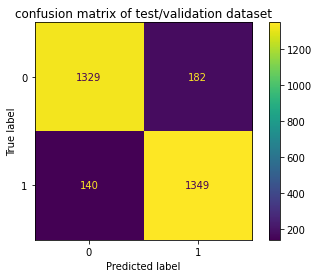

train accuracy: 100.00%
test accuracy: 80.07%
train f1 score: 100.00%
test f1 score: 80.04%
classification report of train results
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5887
           1       1.00      1.00      1.00      6113

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

classification report of test results
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1511
           1       0.80      0.81      0.80      1489

    accuracy                           0.80      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.80      0.80      0.80      3000



In [17]:
DC_best_model = DecisionTreeClassifier(random_state=0)

#cv_scores = cross_val_score( DC_best_model, X=df_feature, 
#                             y=df_label.values.ravel(), 
#                             cv=5, verbose=0 )

DC_best_model.set_params(**DC_clf.best_params_)
print(DC_best_model.get_params())
#print('DC best_model cross validation mean score: %.2f%%' %(cv_scores.mean()*100))

DC_best_model.fit(X_train, y_train.values.ravel())
y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)
plot_confusion_matrix(DC_best_model, X_test, y_test.values.ravel())  
plt.title('confusion matrix of test/validation dataset')
plt.show()
print( 'train accuracy: %.2f%%' %( 100 * accuracy_score(y_train, y_pred_train)) )
print( 'test accuracy: %.2f%%' %( 100 * accuracy_score(y_test_reindexed, y_pred_test)) )
print( 'train f1 score: %.2f%%' %( 100 * f1_score(y_train, y_pred_train, average = 'binary')) )
print( 'test f1 score: %.2f%%' %( 100 * f1_score(y_test_reindexed, y_pred_test, average = 'binary')) )
print( 'classification report of train results\n', classification_report(y_train, y_pred_train) )  
print( 'classification report of test results\n', classification_report(y_test_reindexed, y_pred_test) )  


### __results__

* cross validating RandomForestCl. and DesissionTreeCl. and printing f1 scores and confusion matrixes.

The accurary reduced to ~80% on the test data now

As the confusion matrix plot shows, the false negativ (lower left) and the false positive (upper right) are very less compared to the true positive also called 'sensitivity' (upper left) and true negative also called 'specificity' (lower right). 

A perfect model would have 0 counts in the false positive/negative fields.


## Bonus Teil 1: 

Können Sie begründen, warum Ihr ausgewähltes Modell eine gute Leistung erbringt? 

Hinweis: Falls Sie ein Tree-Modell (wie RandomForrest) gewaehlt haben konnen Sie erst die wichtigen Features anhald _feature _ importances_ erkennen. Dann zeichnen Sie Ihre Daten für 2 der ausgewählten Features (mithilfe von plt.scatter (Feature1, Feature2, c = Label), um zu sehen, wie die Daten verteilt sind.

### identify feature importances

In [18]:
# Platz fuer Ihren Code/Anworten
# using RandomForestClasifier

RF_best_model.feature_importances_
df_importance = pd.DataFrame({'importance': RF_best_model.feature_importances_}, 
                             index=df_feature.columns).sort_values(by='importance', ascending=False)
df_importance

importance
Einkommen             0.329648
PLZ                   0.273798
Age                   0.254141
Weight                0.066878
Height                0.065066
Drink_Nein            0.003688
Drink_Oft             0.003441
Drink_Gelegentlich    0.003340

In [19]:
print(f'sum %% of most 2 important features %.2f%%' %( df_importance.iloc[0:2, 0].sum() * 100) )
print(f'sum %% of most 3 important features %.2f%%' %( df_importance.iloc[0:3, 0].sum() * 100) )


sum % of most 2 important features 60.34%
sum % of most 3 important features 85.76%


In [20]:
most_2_important_feature_plot = px.scatter(data_frame=data_prepared, x='Einkommen', y='Age', color='Kaeufer_Ja')
most_2_important_feature_plot.show()

Above table lists the features ordered by their importance of the best RandomForestClassifier found.
It shown ~33% importance of 'Einkommen' and PLZ and age are quite near together with ~26%
The most 2 important featues have an sum of ~60% whereas the most important 3 features have an importance of ~85%

### __results__
* identified feature importance and listed them in descending order
* summed importence of first 2 and 3 features

sum % of most 2 important features 60.34%
sum % of most 3 important features 85.76%

* scatter plot of the most important 2 features



## Bonus Teil 2: 
Führen Sie eine nested Kreuzvalidierung (cross-validation) für den ausgewaehlten Features durch.

### __nested cross validation__
using features 'Einkommen' and 'Age'

In [21]:
# Platz fuer Ihren Code/Anworten
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Platz fuer Ihren Code/Anworten
base_model = RandomForestClassifier(random_state=0)
# hyper parameter to use in search
## speeding up the search by using the once of the best model found earlier
h_params = {'n_estimators': [100],             #[100, 100, 1000], 
            #'criterion': ['gini', 'entropy'],
            #'max_features': [None, 'sqrt', 'log2'],
            #'min_samples_split': [2,3,4,5],
            'min_samples_leaf': [1],           #[0.2, 0.6, 1],
            'max_depth': [50]}                 #[5, 50, 100, 1000]}

# Number of random trials
NUM_TRIALS = 5

# Arrays to store scores
non_nested_scores = []
nested_scores = []


for i in range(NUM_TRIALS):
    print(f'loop {i} of {NUM_TRIALS}')
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=base_model, param_grid=h_params, cv=inner_cv, n_jobs=-1)
    clf.fit(df_feature, df_label.values.ravel())
    non_nested_scores.append( clf.best_score_ )
    # Nested CV with parameter optimization
    nested_scores = cross_val_score(clf, X=df_feature[ df_importance.index[0:2] ], 
                                    y=df_label.values.ravel(), 
                                    cv=outer_cv, verbose=0) 
    print('nested mean score', nested_scores.mean())
    #print(non_nested_scores)

print(nested_scores.mean())

loop 0 of 5
nested mean score 0.7612666666666666
loop 1 of 5
nested mean score 0.7633333333333333
loop 2 of 5
nested mean score 0.7606666666666667
loop 3 of 5
nested mean score 0.7586666666666666
loop 4 of 5
nested mean score 0.7652
0.7652


In [22]:
df_cvscores = pd.DataFrame({'cv_scores':nested_scores})
cv_plt = px.line(data_frame=df_cvscores)
cv_plt.update_layout( title='Cross Validation scores of best RF model',
                               xaxis_title='k-split',
                               yaxis_title='score')
cv_plt.show()
print('best params',  clf.best_params_)
print('best score %.2f%%' %(clf.best_score_ * 100))

best params {'max_depth': 50, 'min_samples_leaf': 1, 'n_estimators': 100}
best score 89.68%


### __results__
* performed a nested cross validation on RandomForestClassifier re-using the best model parameter identified earlier to minimize runtime  
* score reached 89%

best params {'max_depth': 50, 'min_samples_leaf': 1, 'n_estimators': 100}
best score 89.68%

## Bonus Teil 3:

Gibt es einen Standard-Kauefer? Anders gesagt, gibt es einen typischen Kunde der hoechstwahrscheinlich kaeuft? 

Achtung: diese Aufgabe ist etwa schwrieger als die anderen. 

### __making again a pairplot__

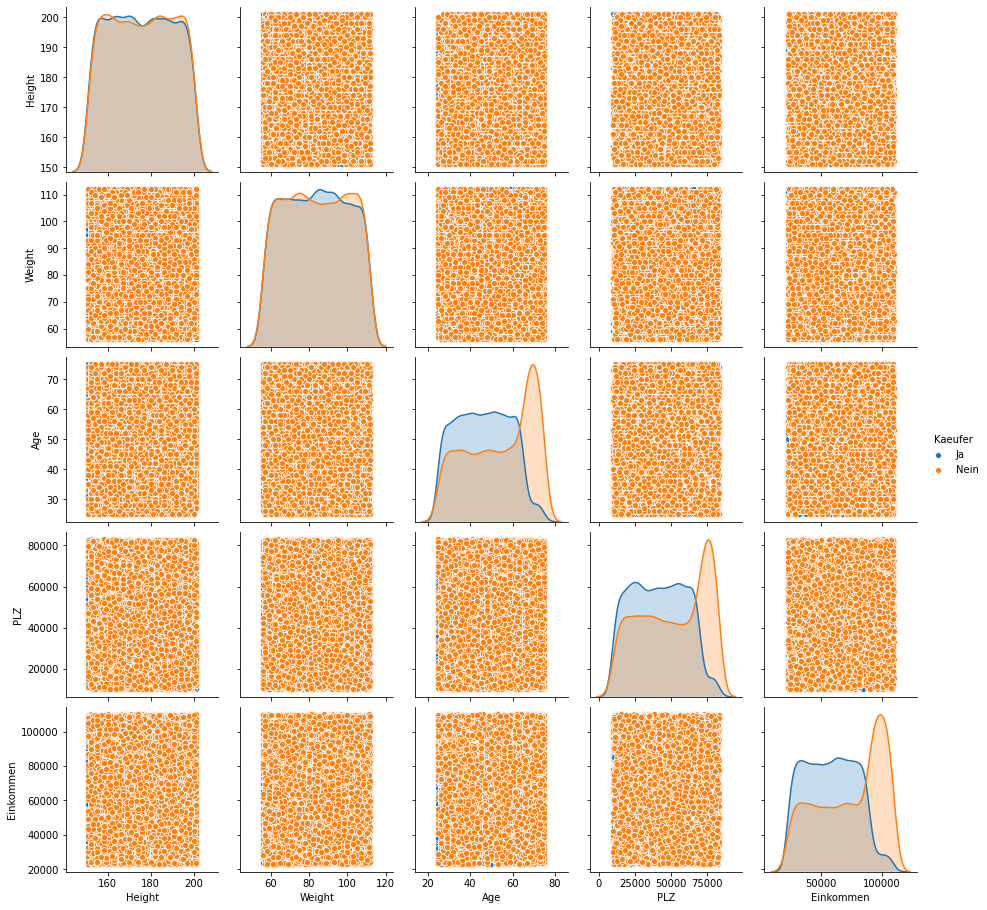

In [23]:
# Platz fuer Ihren Code/Anworten
import seaborn as sns

sns.pairplot(data = data, hue='Kaeufer')

__the pairplot shows, that the company should focus on customers with age > 45 years, living in postal code areas > 4500 and having an income of < ~90k__

### MeanShift clustering

#### __going to cluster data to find more on age, income and PLZ__

In [24]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X_train, quantile=0.1)#, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

In [25]:
print("number of estimated clusters : %d" % n_clusters_)
df_cl_centers = pd.DataFrame(cluster_centers)
df_cl_centers

number of estimated clusters : 3


0         1         2         3         4    5    6    7
0  0.498400  0.499756  0.505685  0.505618  0.492244  0.0  1.0  0.0
1  0.496465  0.514868  0.506559  0.483877  0.496216  1.0  0.0  0.0
2  0.490889  0.498458  0.496915  0.484839  0.521478  0.0  0.0  1.0

__I guess that I need to transform this 7 dimensions to 2-3 vor visualizing the centers, but I don't understand on how to inverse transform everything to identify the ranges of age, income and plz beeing sellers__

#### __plot of cluster centers without PCA reduction__

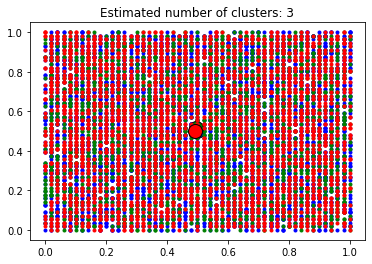

In [26]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X_train.iloc[my_members, 0], X_train.iloc[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

#### __plot of cluster centers with PCA reduction__

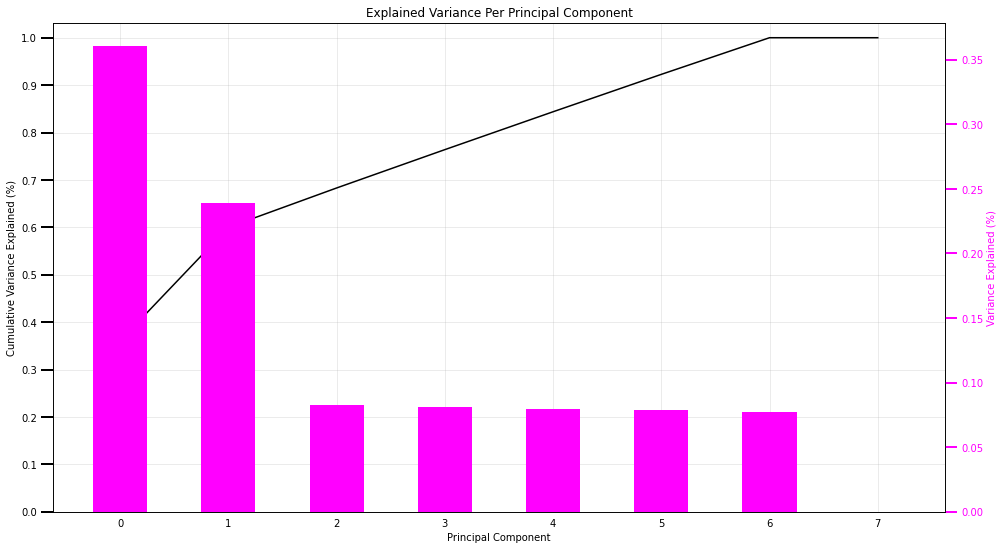

In [27]:
# first reduce dimensions to 2
from sklearn.decomposition import PCA

def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    INPUT: pca - the result of instantiation of PCA in scikit learn
    OUTPUT:
    None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_

    _, ax1 = plt.subplots(figsize=(16, 9))
    cumvals = np.cumsum(vals)

    ax1.plot(ind, cumvals, color='black')
    ax2 = ax1.twinx()
    ax2.bar(ind, vals, color='magenta', width=.5)

    ax1.xaxis.set_tick_params(width=0)
    ax1.yaxis.set_tick_params(width=2, length=12)
    ax1.set(yticks=np.arange(0,1.1,.1))
    ax1.grid(linewidth=.5, alpha=0.5)

    ax1.set_xlabel("Principal Component")
    ax1.set_ylabel("Cumulative Variance Explained (%)")
    ax1.set(title='Explained Variance Per Principal Component')
    ax2.yaxis.label.set_color('magenta')
    ax2.tick_params(axis='y', colors='magenta')
    ax2.yaxis.set_tick_params(width=2, length=12)
    ax2.set(ylabel="Variance Explained (%)")

pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
X_pca = pca.transform(X_train)
scree_plot(pca)


__dimensionality reduction to 2__

In [28]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pd.DataFrame(pca.transform(X_train), index=X_train.index)
pca.explained_variance_ratio_.sum()

0.6000207180999929

number of estimated clusters using PCA reduced dymensions to 2 : 3


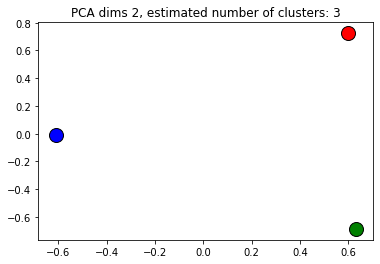

In [29]:
from sklearn.cluster import MeanShift, estimate_bandwidth

ms = MeanShift()
ms.fit(X_pca)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print("number of estimated clusters using PCA reduced dymensions to 2 : %d" % n_clusters_)

#Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X_pca.iloc[my_members, 0], X_pca.iloc[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('PCA dims 2, estimated number of clusters: %d' % n_clusters_)
plt.show()

In [30]:
df_cl_centers = pd.DataFrame(cluster_centers)
# scaler.inverse_transform(
# pca.inverse_transform(
# ms.inverse_transform(df_cl_centers))
df_cl_centers

0         1
0 -0.609583 -0.009152
1  0.630889 -0.688348
2  0.598874  0.725518

### MeanShift with only 3 features manually selected

#### 3D plot of the selected 3 features
buyers only

In [49]:
df_f = pd.DataFrame()
df_f['Einkommen'] = data['Einkommen'][data['Kaeufer']=='Ja']
df_f['Age'] = data['Age'][data['Kaeufer']=='Ja']
df_f['PLZ'] = data['PLZ'][data['Kaeufer']=='Ja']

px.scatter_3d(data_frame=df_f, x='Einkommen', y='Age', z='PLZ')


#### MeanShift cluster analysis

In [51]:
ms = MeanShift().fit(df_f)

In [76]:
df_center = pd.DataFrame(ms.cluster_centers_, columns=df_f.columns).astype(int)

best_customer_plot = px.scatter_3d(data_frame=df_center, x='Einkommen', y='Age', z='PLZ')
best_customer_plot.show()

df_center

Einkommen  Age    PLZ
0      65428   45  45326

### cluster analysis with KMeans
using KMeans[adapted from plotly web page]https://plotly.com/python/v3/ipython-notebooks/baltimore-vital-signs/

:( is gone, lost while updating the results ... ):

### __results__
* pairplot showing the customer buying are 

age > 45 years, living in postal code areas > 4500 and having an income of < ~90k

* 3 centers of cluster have been calculated
* I expect them to be income, age and PLZ as already seen in the pairplot at the beginning, but the mapping to the ranges of features is something I'm struggling with :(

* finally plotted 3D scatter plot of the features income, age and PLZ of only buyers
* MeanShift cluster analysis returning the center point of this 3 dimensions
* plotting the center in a 3D graphic which is the most important customer definition of the company we got the data from

This is the customer the company shall focus on 

|Einkommen|Age|PLZ|
|---------|---|---|
|65428|45|45326|

In [31]:
from sklearn.cluster import KMeans
import plotly.graph_objs as pgo

n_clusters = 3

def cluster(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_pca)
    Z = kmeans.predict(X_pca)
    return kmeans, Z

max_clusters = 5 #len(X_train)
# n_clusters = max_clusters would be trivial clustering.
inertias = np.zeros(max_clusters)


for i in list(range(1, max_clusters)):
    kmeans, Z = cluster(i)
    inertias[i] = kmeans.inertia_
 

cluster_plot_data = pgo.Scatter(
            x=list(range(1, max_clusters)),
            y=inertias[1:])

In [32]:
layout = pgo.Layout(
    title='Investigate k-means clustering',
    xaxis=pgo.layout.XAxis(title='Number of clusters',
                    range=[0, max_clusters]),
    yaxis=pgo.layout.YAxis(title='Inertia')
)

fig = pgo.Figure(data=cluster_plot_data, layout=layout)
fig.show()

# lost & found 

best_model cross validation mean score: 89.67%


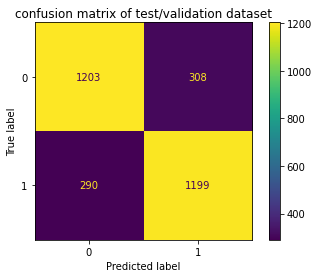

train accuracy: 100.00%
test accuracy: 80.07%
train f1 score: 100.00%
test f1 score: 80.04%
classification report of train results
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5887
           1       1.00      1.00      1.00      6113

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

classification report of test results
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1511
           1       0.80      0.81      0.80      1489

    accuracy                           0.80      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.80      0.80      0.80      3000



In [33]:
best_model = RandomForestClassifier(random_state=0)
best_model.set_params(**clf.best_params_)
#print(best_model.get_params())

cv_scores = cross_val_score( best_model, X=df_feature, 
                             y=df_label.values.ravel(), 
                             cv=5, verbose=0 )
print('best_model cross validation mean score: %.2f%%' %(cv_scores.mean()*100))
best_model.fit(X_train, y_train.values.ravel())
y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test.values.ravel())  
plt.title('confusion matrix of test/validation dataset')
plt.show()
print( 'train accuracy: %.2f%%' %( 100 * accuracy_score(y_train, y_pred_train)) )
print( 'test accuracy: %.2f%%' %( 100 * accuracy_score(y_test_reindexed, y_pred_test)) )
print( 'train f1 score: %.2f%%' %( 100 * f1_score(y_train, y_pred_train, average = 'binary')) )
print( 'test f1 score: %.2f%%' %( 100 * f1_score(y_test_reindexed, y_pred_test, average = 'binary')) )
print( 'classification report of train results\n', classification_report(y_train, y_pred_train) )  
print( 'classification report of test results\n', classification_report(y_test_reindexed, y_pred_test) )  
